In [1]:
%matplotlib inline
import math
import numpy as np
import scipy
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Propensity score matching analysis

READ two feature sets: 
- DT_base
- DT_cplx

In [11]:
## read "DT_base" -- DT with basic features
DT_base = pd.read_csv('./Test_data/src_data/DT_base.csv')
DT_base.head()

##----- Not finished ##
## read "DT_cplx" -- DT with complex features
# DT_cplx = pd.read_csv('../Test_data/src_data/DT_cplx.csv')
# DT_cplx.head()
##-----

#### DT_m: merge DT_base and DT_cplx
colnames = DT_base.keys()
DT_m = DT_base.loc[:, colnames[1:-1]]  #-- all features
DT_y = DT_base['n_citation']           #-- only outcome-n_citation

##----- Not finished ##
# DT_m = merge(DT_base, DT_cplx)
##-----

In [12]:
DT_m.head()

,group,title_len,abs_len,no_author
0,1,7,95,19
1,1,11,104,95
2,1,7,201,33
3,1,9,226,52
4,1,7,94,16


## Method 1: use NearestNeighbors from sklearn
- Reference: https://stats.stackexchange.com/questions/206832/matched-pairs-in-python-propensity-score-matching

In [75]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

def get_matching_pairs(treated_df, non_treated_df, scaler=True):

    treated_x = treated_df.values
    non_treated_x = non_treated_df.values
    if scaler == True:
        scaler = StandardScaler()
    if scaler:
        scaler.fit(treated_x)
        treated_x = scaler.transform(treated_x)
        non_treated_x = scaler.transform(non_treated_x)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(non_treated_x)
    distances, indices = nbrs.kneighbors(treated_x)
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

In [80]:

treated_df = DT_m.loc[ DT_m['group'] == 1,  colnames[2:-1]]
non_treated_df = DT_m.loc[ DT_m['group'] == 0,  colnames[2:-1]]
print(treated_df.shape, non_treated_df.shape)

matched_df = get_matching_pairs(treated_df, non_treated_df)
print(matched_df.shape)
matched_df.head()

(4571, 3) (3519, 3)
(4571, 3)


,title_len,abs_len,no_author
5068,7,89,20
6943,11,96,94
6215,7,206,33
7151,9,228,52
5359,7,88,14


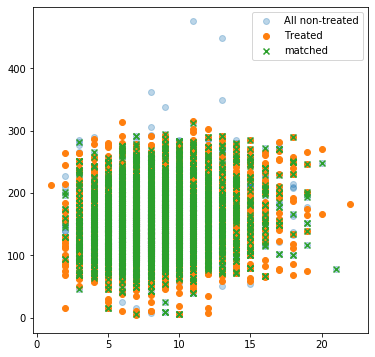

In [81]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(non_treated_df['title_len'], non_treated_df['abs_len'], alpha=0.3, label='All non-treated')
plt.scatter(treated_df['title_len'], treated_df['abs_len'], label='Treated')
plt.scatter(matched_df['title_len'], matched_df['abs_len'], marker='x', label='matched')
plt.legend()
# plt.xlim(-1,2)

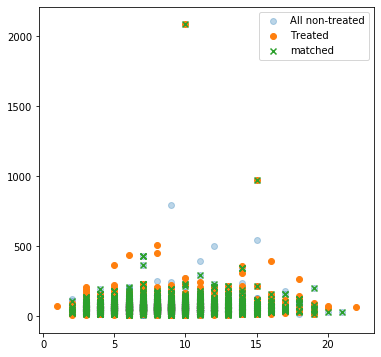

In [82]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(non_treated_df['title_len'], non_treated_df['no_author'], alpha=0.3, label='All non-treated')
plt.scatter(treated_df['title_len'], treated_df['no_author'], label='Treated')
plt.scatter(matched_df['title_len'], matched_df['no_author'], marker='x', label='matched')
plt.legend()

## Method 2: Regression  [Not-finished]
A logistic/logit/probit regression model was conducted with “group” as the dependent variable and ??? confounding variables as the independent variables.

The regression model(s) are used to generate propensity scores. In this case, we are using the covariates on the right side of the equation to estimate the probability of "group" (mention_code = 1).